<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/03_nn_multi_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 뉴럴네트워크 다중분류
- iris datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### 1.데이터준비

In [2]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

--2023-12-29 06:50:02--  https://raw.githubusercontent.com/devdio/datasets/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0s      

2023-12-29 06:50:02 (24.4 MB/s) - ‘iris.csv’ saved [5107/5107]



In [3]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [5]:
iris.head()
df = iris.copy()

### 2.테스트 데이터 준비

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
X = df.drop(['Id', 'Species'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 3.전처리

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [11]:
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [13]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train) # 원-핫 인코딩
y_train_o

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

### 4.모델만들기

In [14]:
X_train_s.shape

(120, 4)

In [19]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=6, activation='relu', input_shape=(4,)),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=3, activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 30        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
Total params: 63 (252.00 Byte)
Trainable params: 63 (252.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5.학습

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
EPOCHS = 150
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train_o,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=1
)

Epoch 1/150
6/6 [==============================] - 0s 35ms/step - loss: 0.4588 - accuracy: 0.8542 - val_loss: 0.4981 - val_accuracy: 0.8333
Epoch 2/150
6/6 [==============================] - 0s 17ms/step - loss: 0.4548 - accuracy: 0.8542 - val_loss: 0.4925 - val_accuracy: 0.8333
Epoch 3/150
6/6 [==============================] - 0s 24ms/step - loss: 0.4506 - accuracy: 0.8542 - val_loss: 0.4879 - val_accuracy: 0.8333
Epoch 4/150
6/6 [==============================] - 0s 16ms/step - loss: 0.4464 - accuracy: 0.8542 - val_loss: 0.4835 - val_accuracy: 0.8333
Epoch 5/150
6/6 [==============================] - 0s 39ms/step - loss: 0.4425 - accuracy: 0.8646 - val_loss: 0.4797 - val_accuracy: 0.8333
Epoch 6/150
6/6 [==============================] - 0s 44ms/step - loss: 0.4384 - accuracy: 0.8646 - val_loss: 0.4751 - val_accuracy: 0.8333
Epoch 7/150
6/6 [==============================] - 0s 20ms/step - loss: 0.4349 - accuracy: 0.8750 - val_loss: 0.4711 - val_accuracy: 0.8333
Epoch 8/150
6/6 [===

In [26]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16, 8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
  plt.legend()
  plt.show()

### 6.평가

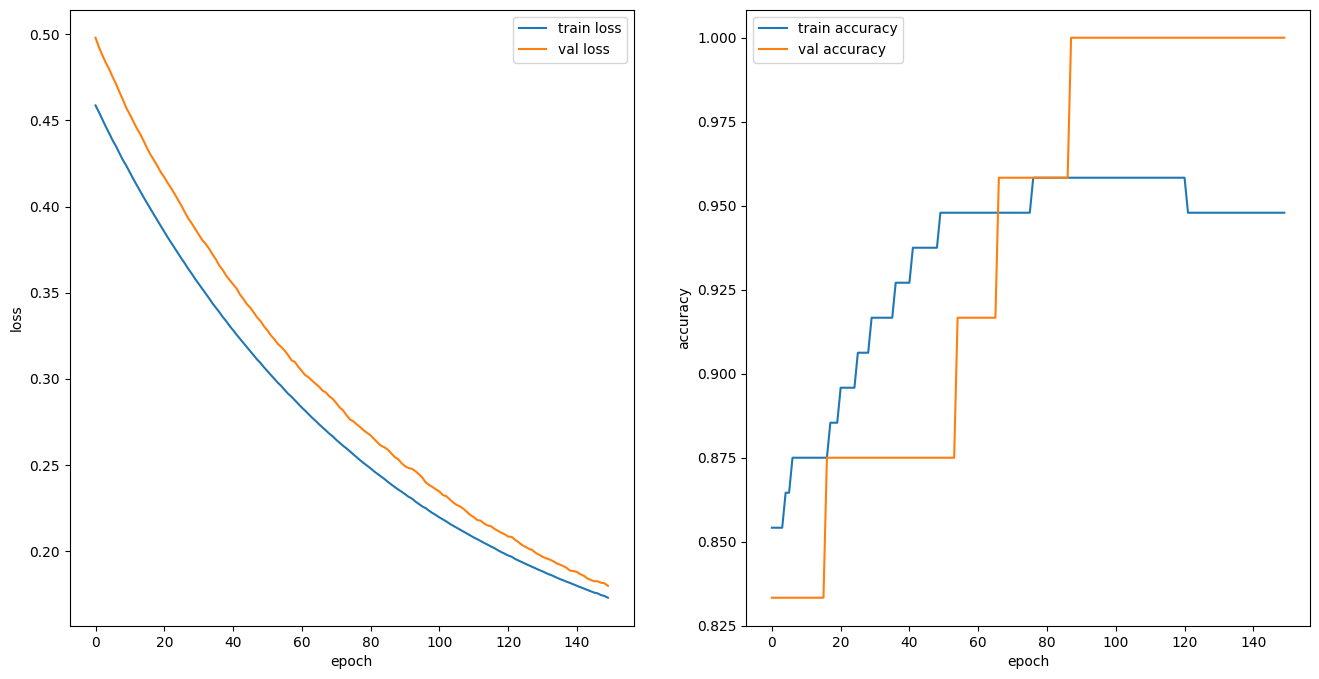

In [27]:
plot_history(history)

In [28]:
X_test_s = scaler.transform(X_test)

In [40]:
y_test = le.transform(y_test)

In [41]:
# 예측

y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 24ms/step


array([[1.04948096e-01, 7.31456041e-01, 1.63595766e-01],
       [9.97570217e-01, 2.20254459e-03, 2.27267636e-04],
       [1.24123908e-04, 3.81964492e-04, 9.99493778e-01],
       [1.00714542e-01, 6.79823697e-01, 2.19461739e-01],
       [9.06127095e-02, 5.82924128e-01, 3.26463163e-01],
       [9.94438350e-01, 5.01608988e-03, 5.45623770e-04],
       [1.13758951e-01, 7.56115973e-01, 1.30125180e-01],
       [3.34865996e-03, 1.41443480e-02, 9.82506931e-01],
       [7.10246637e-02, 4.28526491e-01, 5.00448763e-01],
       [1.06833279e-01, 7.61524200e-01, 1.31642610e-01],
       [2.38760971e-02, 1.23346761e-01, 8.52777123e-01],
       [9.96146798e-01, 3.48304678e-03, 3.70103517e-04],
       [9.97904301e-01, 1.90126162e-03, 1.94341541e-04],
       [9.96425807e-01, 3.23228422e-03, 3.41816660e-04],
       [9.98903811e-01, 9.98203293e-04, 9.79139513e-05],
       [1.02995805e-01, 7.06041276e-01, 1.90962911e-01],
       [2.78337626e-03, 1.15470821e-02, 9.85669553e-01],
       [1.06833279e-01, 7.61524

In [46]:
y_pred = np.argmax(y_pred, axis=1)

In [47]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def print_metrics(y_test, y_pred):
  print(f'accuracy : {accuracy_score(y_test, y_pred)}')
  print(f'accuracy : {recall_score(y_test, y_pred, average="macro")}')
  print(f'accuracy : {precision_score(y_test, y_pred, average="macro")}')

In [49]:
print_metrics(y_test, y_pred)

accuracy : 0.9666666666666667
accuracy : 0.9629629629629629
accuracy : 0.9722222222222222
